Author: Alan Mössinger
# Decision Trees


## Objectives

*   Develop a classification model using Decision Tree Algorithm


A popular machine learning algorithm, Decision Trees. You will use this classification algorithm to build a model from the historical data of patients, and their response to different medications. Then you will use the trained decision tree to predict the class of an unknown patient, or to find a proper drug for a new patient. In the end there is a full 
inpretation of the results and durign the journey a miriad of graphs to assist in 
understanding the data set. Have fun!


Unlocking Insights with Decision Trees and Entropy in Machine Learning: 
    A Journey into Drug Testing

In the intricate landscape of machine learning, decision trees stand out 
as a beacon of clarity and efficiency. Today, let's explore this fascinating 
concept, especially through the lens of entropy, as it applies to the critical 
and complex field of drug testing. 🧪💊

Imagine you're at the crossroads of numerous healthcare decisions, each path 
determined by intricate data. This is where decision trees, guided by the principle 
of entropy, become indispensable. Entropy, in machine learning, is a measure of disorder
or uncertainty. In the context of decision trees, it helps in determining the most 
informative features that can split the data effectively, leading us to clearer, 
more accurate outcomes. 🌐🧬

In the realm of drug testing, decision trees, refined by entropy, aid researchers 
and healthcare professionals in predicting patient reactions to drugs, assessing 
medication efficacy, and identifying possible side effects. This approach is not
just about making predictions – it's about making those predictions as precise and
reliable as possible, enhancing patient care and therapeutic effectiveness. 🩺💡

But why are decision trees and entropy pivotal in such a specialized field? Together, 
they demystify complex datasets, allowing for more informed decisions in pharmaceutical 
research. 🚀👩‍⚕️

Join me as we delve into the world of decision trees, illuminated by the concept of 
entropy, and discover their transformative applications in drug testing – a journey 
where advanced data science empowers healthcare innovation. 🌟📈

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">About the dataset</a></li>
        <li><a href="https://#downloading_data">Downloading the Data</a></li>
        <li><a href="https://#pre-processing">Pre-processing</a></li>
        <li><a href="https://#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="https://#modeling">Modeling</a></li>
        <li><a href="https://#prediction">Prediction</a></li>
        <li><a href="https://#evaluation">Evaluation</a></li>
        <li><a href="https://#visualization">Visualization</a></li>
        <li><a href="https://#interpretation">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


Import the Following Libraries:

<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>


if you uisng you own version comment out


In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split


<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.
</div>


<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    To download the data, we will use pandas library to read it directly into a dataframe from IBM Object Storage.
</div>


In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.shape

(200, 6)

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,200.0,NaN,NaN,NaN,44.315,16.544315,15.0,31.0,45.0,58.0,74.0
Sex,200,2,M,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BP,200,3,HIGH,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol,200,2,HIGH,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Na_to_K,200.0,NaN,NaN,NaN,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247
Drug,200,5,drugY,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>df</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of df) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


Remove the column containing the target name since it doesn't contain numeric values.


# Quick visualization analysis

<function matplotlib.pyplot.show(close=None, block=None)>

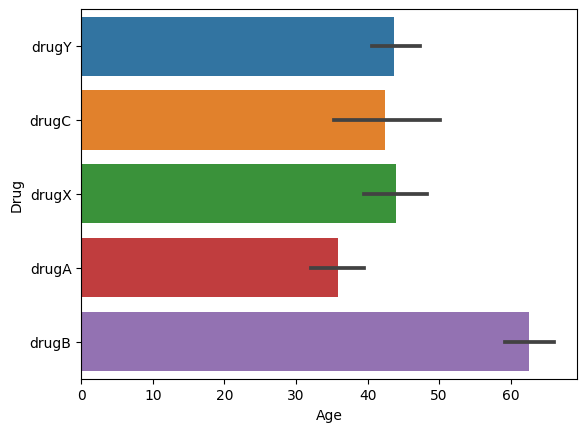

In [8]:
sns.barplot(x = 'Age', y = 'Drug', data=df)
plt.show
#The back lines on the bars represent the error bar, which shows the uncertainty 
#around the estimate. They represent the confidence interval and gives a range that
# is expected to contain the true mean of the dataset with a a confidence (95%) by default.
#Therefore, the shorter the error bar, the most certain the estimate.

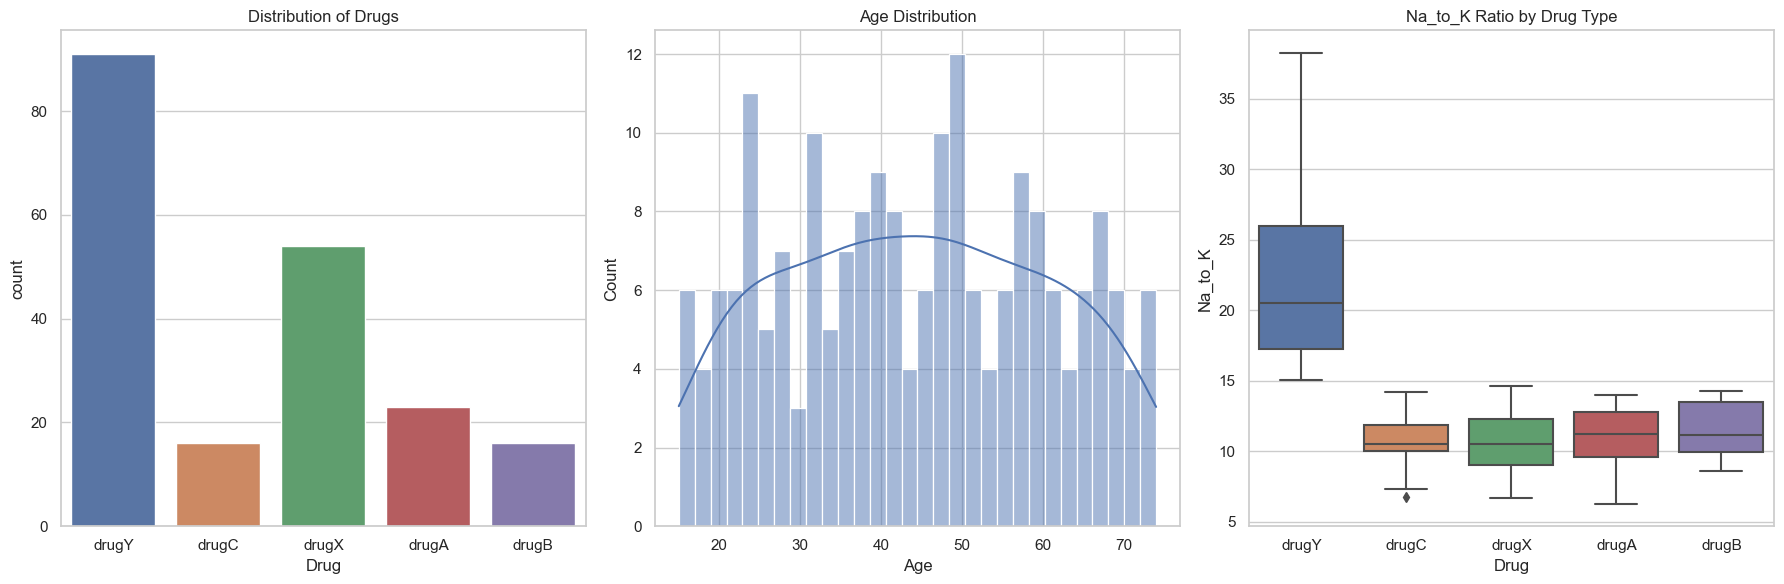

In [9]:
#Pythonic way
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for the 'Drug' column
sns.countplot(ax=axes[0], x='Drug', data=df)
axes[0].set_title('Distribution of Drugs')

# Histogram for the 'Age' column
sns.histplot(ax=axes[1], x='Age', bins=30, kde=True, data=df)
axes[1].set_title('Age Distribution')

# Box plot for 'Na_to_K' across different 'Drug' types
sns.boxplot(ax=axes[2], x='Drug', y='Na_to_K', data=df)
axes[2].set_title('Na_to_K Ratio by Drug Type')

# Show the plots
plt.tight_layout()
plt.show()    

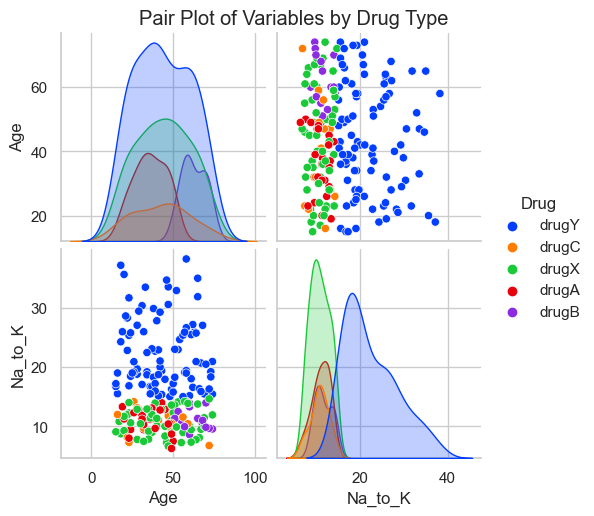

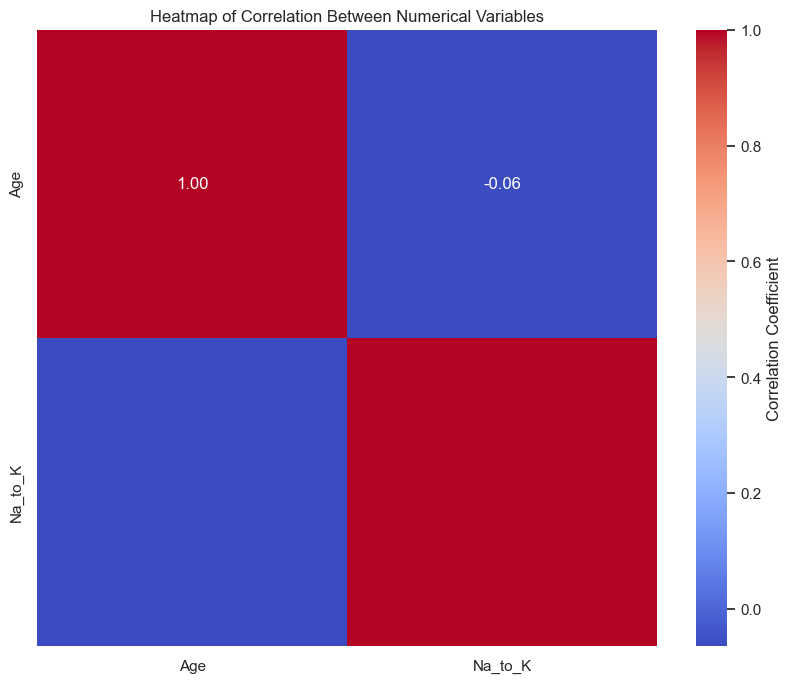

In [10]:
# Let's create a pair plot to explore the dataset further
pair_plot = sns.pairplot(df, hue='Drug', palette='bright')

# Show the pair plot
pair_plot.fig.suptitle('Pair Plot of Variables by Drug Type', y=1.02)  # Adjust title position
plt.show()

# Compute the correlation matrix for the numerical variables
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
heatmap.set_title('Heatmap of Correlation Between Numerical Variables')
plt.show()

In [11]:
#Create X array
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using **pandas.get_dummies()**
to convert the categorical variable into dummy/indicator variables.


In [12]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])
#option 2: df = pd.get_dummies(df, columns=['category_column'], drop_first=True)
#drop_first=True is to avoid redundant dummy variable trap

#My favorite option
#option3: mapping = {'category': 'category2': 2, 'category3': 3}
#df['Category_column'] = df['Category column'].map(mapping)

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now we can fill the target variable.


In [13]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [14]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [15]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match.


In [16]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',
      ' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (140, 5) &  Size of Y training set (140,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match.


In [17]:
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of\
Y training set {}'.format(y_testset.shape))

Shape of X training set (60, 5) &  Size ofY training set (60,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [18]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [19]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [20]:
predTree = drugTree.predict(X_testset)

Print out <b>predTree</b> and <b>y_testset</b> to visually and compare the predictions to the actual values.


In [21]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


<hr>

<div id="visualization">
    <h2>Visualization</h2>

Let's visualize the tree and interpret the results

</div>


In [23]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

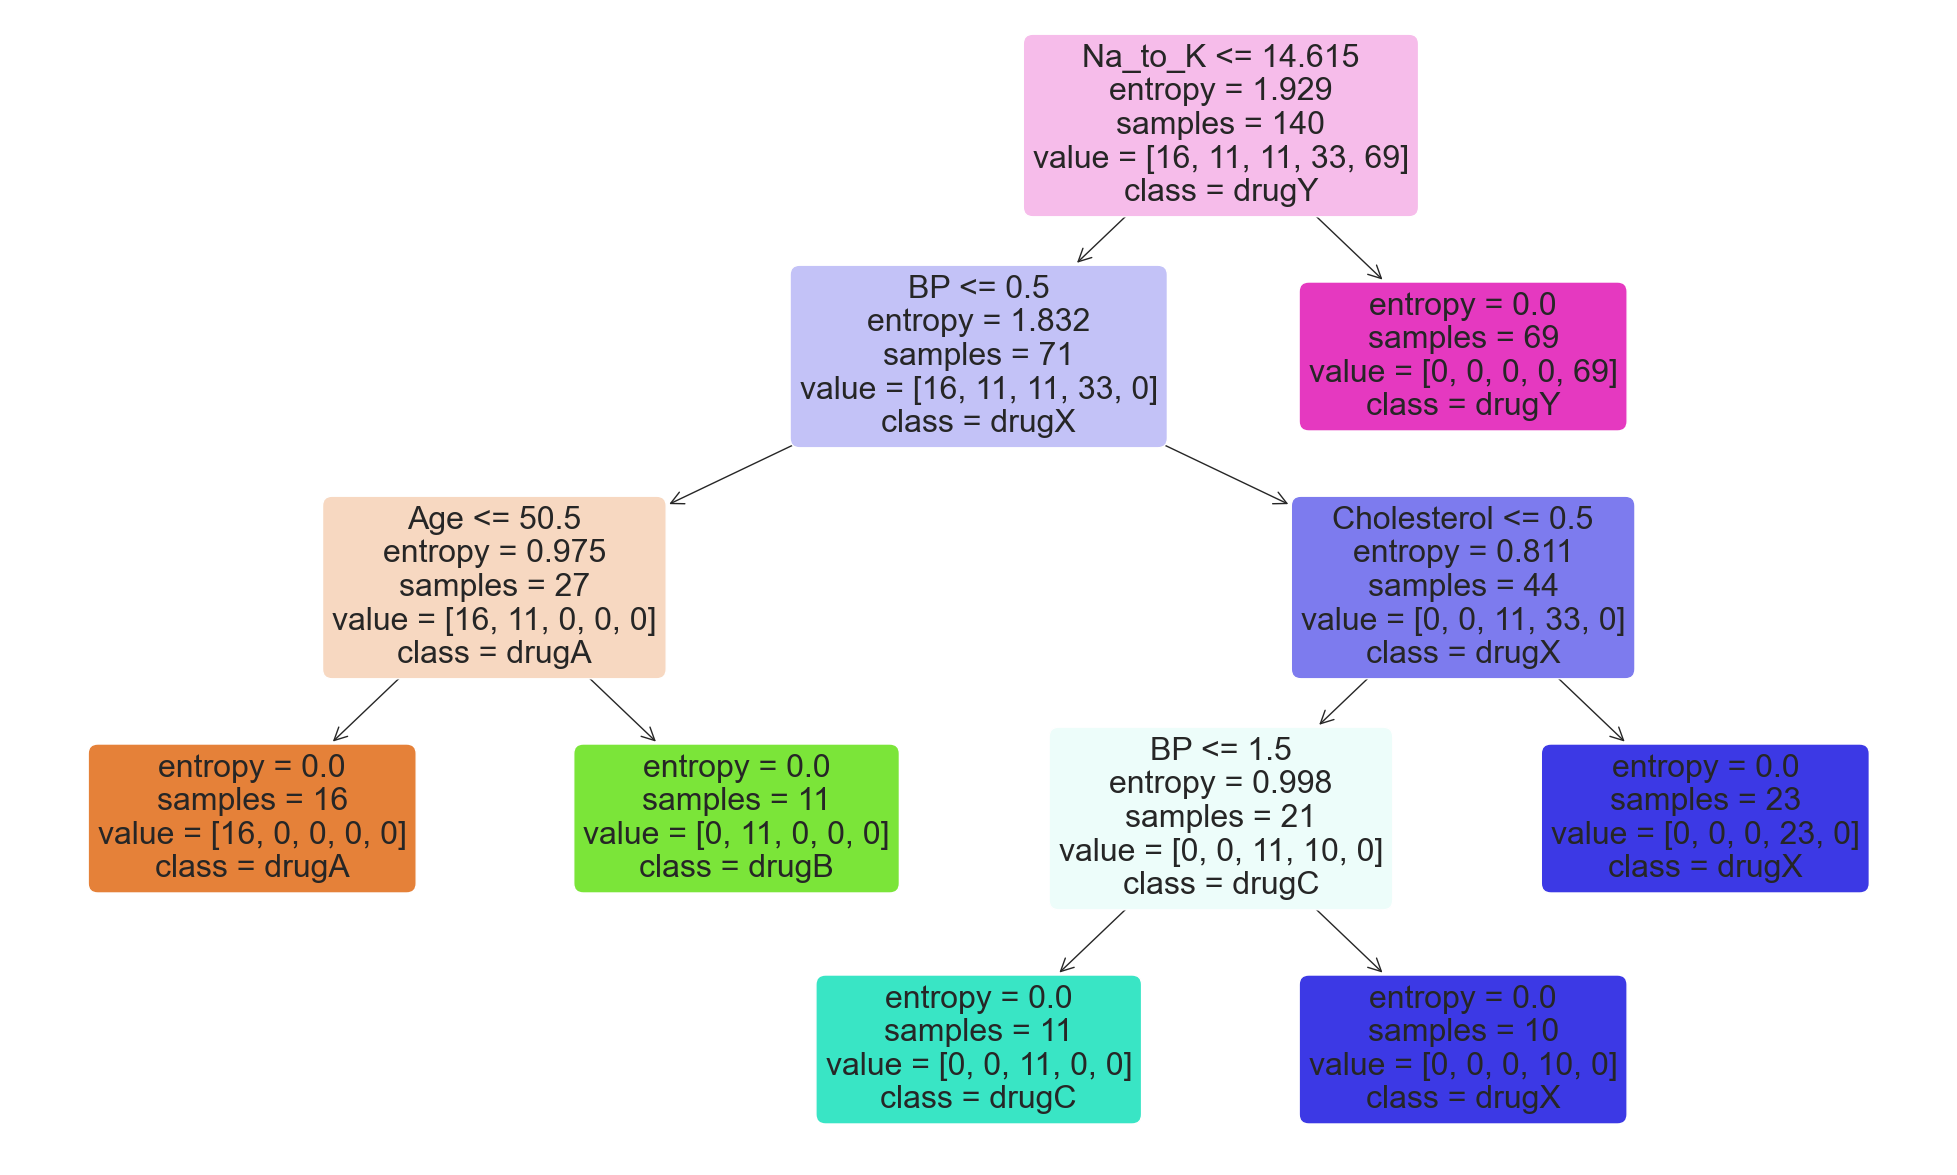

In [24]:
plt.figure(figsize=(25,15))


feature_names_list = df.columns[0:5].tolist()
class_names_list = drugTree.classes_.astype(str).tolist()

tree.plot_tree(drugTree,
              feature_names=feature_names_list,
              class_names = class_names_list,
              filled=True,
              rounded = True,
              fontsize = 23)

#create a color legend
cmap = ListedColormap

plt.show()

# Interpretation of the model

Node 0 (Root Node):
The decision tree starts at the root node with an entropy of 1.929, which 
is relatively high, indicating a mixed set of classes in the initial dataset.
The split is made on the feature Na_to_K with a threshold of 14.615. This means 
that the algorithm found that separating samples based on whether their Na_to_K ratio is less than or equal to 14.615 or greater 
leads to the greatest information gain (i.e., reduction in entropy).

Node 1:
This node has an entropy of 1.832 and further splits the samples that had 
a Na_to_K ratio less than or equal to 14.615.
It splits based on the feature BP with a threshold of 0.500. This would typically
correspond to a binary categorical variable, likely encoding for 'HIGH'/'NORMAL' 
BP categories.

Node 2:
The samples that fell into this node have lower entropy (0.975), meaning the 
classes are becoming more homogeneous as we move down the tree.
This node splits the data based on Age with a threshold of 50.500 years.

Node 3 and Node 4:
These nodes are leaf nodes with an entropy of 0, indicating that they are 
perfectly pure. All samples at these nodes belong to the same class, so no 
further splitting is necessary.

Node 5:
This node splits the data that had a 'NORMAL' BP (based on the previous 
split on BP > 0.500).
It has an entropy of 0.811, and it makes a decision based on Cholesterol 
with a threshold of 0.500.

Node 6:
This node has an entropy of 0.998 and splits based on BP again, but with 
a different threshold (1.500), indicating another category of BP is being 
considered here.

Node 7 and Node 8:
These are also leaf nodes with an entropy of 0, 
indicating pure classes.

Node 9 and Node 10:
These are leaf nodes as well, with Node 10 directly from the 
root node where Na_to_K was greater than 14.615. The fact that it's a 
leaf node with an entropy of 0 suggests that samples with a Na_to_K ratio 
above this threshold are homogeneously belonging to a single class.


To understand the difference between Node 3 and Node 4, and why one leads 
to the prediction of 'DrugA' and the other to 'DrugB', we need to look at 
the path taken to reach each node and the conditions at each parent node.

Here's a hypothetical scenario based on the information we have:

Node 1 splits on the feature BP with a threshold of 0.5. In our encoding, 
let's assume that 'HIGH' and 'LOW' BP are represented by values below or 
equal to 0.5, and 'NORMAL' BP is represented by values above 0.5.
Node 2 further splits the samples with 'HIGH'/'LOW' BP based on the feature 
Age with a threshold of 50.5 years.
From this, we can deduce:

Node 3 is reached if the patient has 'HIGH'/'LOW' BP (BP <= 0.5 at Node 1) 
and is younger than or equal to 50 years (Age <= 50.5 at Node 2). The tree has 
learned from the training data that patients with these characteristics are most
likely to be prescribed 'DrugA'.
Node 4, on the other hand, is reached if the patient has 'HIGH'/'LOW' BP but is 
older than 50 years (Age > 50.5 at Node 2). The decision tree has found that 
patients with these characteristics typically require 'DrugB'.
The exact reason why the decision tree makes these distinctions comes down to 
the patterns it has recognized in the training data. There may be a trend in the
historical data where younger patients with 'HIGH'/'LOW' BP respond better to 
'DrugA', whereas older patients with the same BP levels respond better to 'DrugB'.

Keep in mind that the actual interpretation would require looking at the exact 
training data and the model's learning process. The thresholds and the corresponding
class predictions are a result of the model's training on that specific dataset.


Thanks to IBM and

Saeed Aghabozorgi


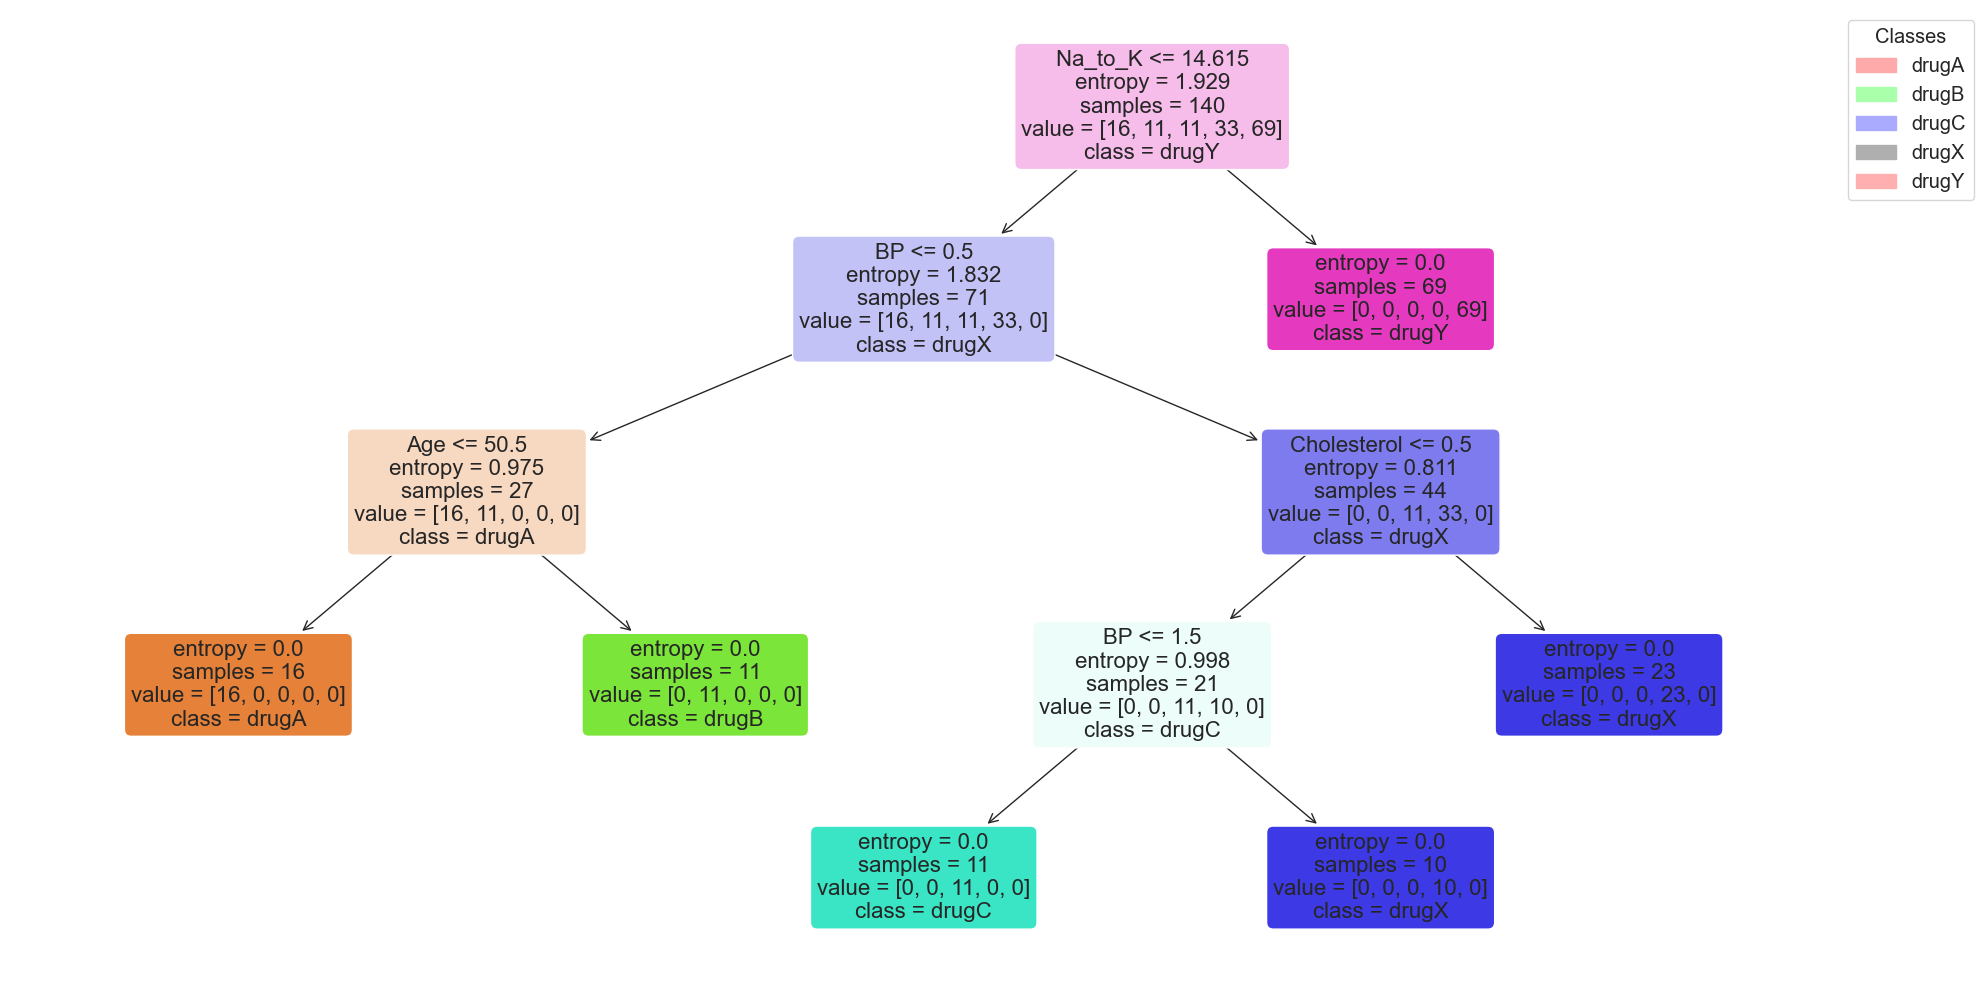

In [26]:
# Faster code and better view of the tree. Same result.
# Preprocess the data: label encoding for categorical variables
le_sex = preprocessing.LabelEncoder()
le_BP = preprocessing.LabelEncoder()
le_Chol = preprocessing.LabelEncoder()

le_sex.fit(df['Sex'])
le_BP.fit(df['BP'])
le_Chol.fit(df['Cholesterol'])

df['Sex'] = le_sex.transform(df['Sex'])
df['BP'] = le_BP.transform(df['BP'])
df['Cholesterol'] = le_Chol.transform(df['Cholesterol'])

# Split the data into features and target variable
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df["Drug"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Initialize and train the decision tree model
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
drugTree.fit(X_train, y_train)

# Feature names and class names for plotting
feature_names = df.columns[0:5].tolist()
class_names = drugTree.classes_

# Create a decision tree plot with a color legend
plt.figure(figsize=(20,10))
tree_plot = plot_tree(drugTree,
                      feature_names=feature_names,
                      class_names=class_names,
                      filled=True,
                      rounded=True,
                      fontsize=16)

# Create a color legend for the classes
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF', '#FFAFAF'])
patches = [mpatches.Patch(color=cmap(i), label=class_names[i]) for i in range(len(class_names))]
plt.legend(handles=patches, title="Classes", title_fontsize='large', 
           fontsize='large', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Now let's apply a faster approach with full interpretation of the results

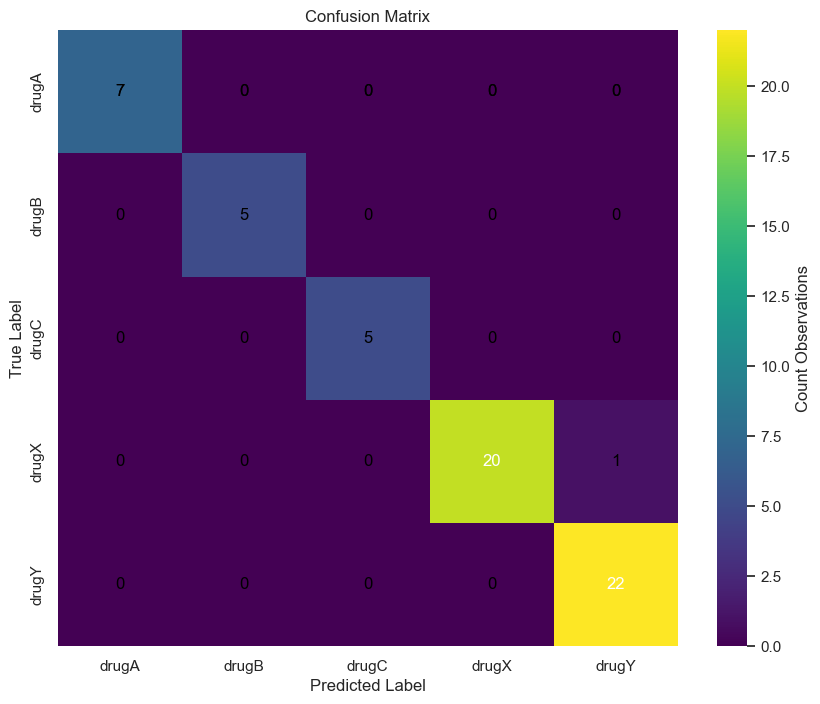

,precision,recall,f1-score,support
drugA,1.000000,1.000000,1.000000,7.000000
drugB,1.000000,1.000000,1.000000,5.000000
drugC,1.000000,1.000000,1.000000,5.000000
drugX,1.000000,0.952381,0.975610,21.000000
drugY,0.956522,1.000000,0.977778,22.000000
accuracy,0.983333,0.983333,0.983333,0.983333
macro avg,0.991304,0.990476,0.990678,60.000000
weighted avg,0.984058,0.983333,0.983315,60.000000


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Assume y_test and y_pred are available from the previous model predictions
# y_test = ... (actual labels)
# y_pred = ... (predicted labels from the decision tree)

# Compute classification report which includes precision, recall, f1-score, and support
class_report = classification_report(y_test, predTree, 
                                     target_names=drugTree.classes_, output_dict=True)

# Convert the classification report into a DataFrame
report_df = pd.DataFrame(class_report).transpose()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, predTree)

# Create a heatmap for the confusion matrix for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=drugTree.classes_, yticklabels=drugTree.classes_,
           annot_kws = {"size":12, "color": "black"},
           cbar_kws = {'label': 'Count Observations'})

# Manually add text annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, str(conf_matrix[i, j]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 color="black" if conf_matrix[i, j] < conf_matrix.max() / 2 else "white")

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Display the classification report DataFrame
report_df

# Based on the classification report data here's an interpretation for each drug class:

Drug A:
Precision: Since precision is 1.00, all instances predicted as Drug A are actually Drug A (no false positives).
Recall: Recall is also 1.00, indicating that all actual instances of Drug A were correctly predicted as Drug A (no false negatives).
F1-Score: The F1-score is 1.00, which is the best possible score, reflecting perfect precision and recall.
Support: There were 7 instances of Drug A in the test set.

Drug B:
The precision, recall, and F1-score are all 1.00, indicating perfect prediction for Drug B, with 5 instances in the test set.

Drug C:
The metrics are identical to Drug A and B, with perfect scores and 5 instances in the test set.

Drug X:
Precision: Precision is 1.00, so all instances predicted as Drug X are correct.
Recall: Recall is slightly less than 1 at 0.95, meaning there was at least one instance where Drug X was the actual class but the model predicted a different class.
F1-Score: The F1-score is 0.98, indicating a very high performance, but not perfect, primarily due to the recall being less than 1.
Support: There were 21 instances of Drug X in the test set.

Drug Y:
Precision: Precision is slightly less than 1 at 0.96, indicating that there were a few instances predicted as Drug Y that were not actually Drug Y.
Recall: Recall is 1.00, which means all actual instances of Drug Y were predicted correctly.
F1-Score: The F1-score is approximately 0.98, which is very good, but the precision brings it down slightly.
Support: There were 22 instances of Drug Y in the test set.
Accuracy:

The overall accuracy of the model is 98.33%, which is very high, indicating that the model is performing very well on this test set.

Macro Avg:
The macro average for precision, recall, and F1-score are all above 0.99, suggesting that the model is performing consistently across all classes without any significant bias toward any particular class.
Weighted Avg:

The weighted averages for precision and F1-score are slightly lower than the macro averages, but still above 0.98, which adjusts for the number of instances in each class, indicating that the model is performing well even when considering the varying support for each class.
To interpret the confusion matrix, I would need to view the image of the confusion matrix that you have uploaded. However, given the high precision and recall values for all the drugs, we can infer that the confusion matrix will show high values along the diagonal (indicating correct predictions) and very few off-diagonal values (indicating incorrect predictions).

Here are the equations for the metrics:
Precision for a class is calculated as:
Precision= True Positives / (False Positives + True Positives)
 
Recall for a class is calculated as:
Recall= True Positives / (False Negatives + True Positives)
 
F1-Score is the harmonic mean of precision and recall:
F1-Score= 2 x (PrecisionxRecall / Precision+Recall)
 
Accuracy for the entire model is calculated as:
Accuracy= Total True Positives across all classes / Total number of instances
 
Given the information, the model appears to perform exceptionally well across all classes. The slight deviations from perfect scores in Drug X and Drug Y might be due to a few misclassifications, which is normal and expected in practice.

